In [2]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [3]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Linear Discriminant Analysis Model

Model Evaluation with 2 features:
Accuracy: 0.7410342777887854
Recall: 0.7905092592592593
F1 Score: 0.7581868640148012
Selected Features: ['AgeCategory', 'GenHealth']

Model Evaluation with 3 features:
Accuracy: 0.7439072716465227
Recall: 0.8016975308641975
F1 Score: 0.7627787464439754
Selected Features: ['DiffWalking', 'AgeCategory', 'GenHealth']

Model Evaluation with 4 features:
Accuracy: 0.7463839904893996
Recall: 0.7972608024691358
F1 Score: 0.7635322372067246
Selected Features: ['DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 5 features:
Accuracy: 0.7456905092133941
Recall: 0.7826003086419753
F1 Score: 0.7596666978747307
Selected Features: ['PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 6 features:
Accuracy: 0.7491579155934218
Recall: 0.7839506172839507
F1 Score: 0.7624765478424016
Selected Features: ['Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation w

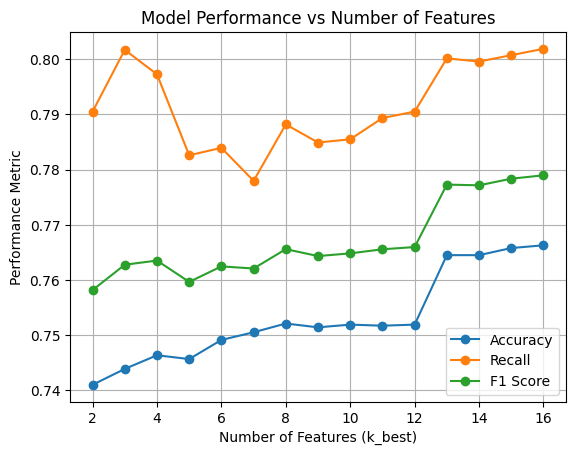

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, f1_score


# Initialize lists to store results
feature_numbers_to_try = list(range(2, 17))
accuracy_scores = []
recall_scores = []
f1_scores = []

# Try feature selection for different values of k_best
for k_best in feature_numbers_to_try:
    # Feature selection with mutual information
    selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)

    # Initialize the Linear Discriminant Analysis model
    lda_model = LinearDiscriminantAnalysis(solver='svd')

    # Fit the model on the selected training data
    lda_model.fit(x_train_selected, y_train)

    # Make predictions on the selected test data
    y_pred = lda_model.predict(x_test_selected)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print model evaluation
    print(f"Model Evaluation with {k_best} features:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Selected Features: {list(x.columns[selector.get_support()])}\n")

    # Append evaluation metrics to the lists
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the results
plt.plot(feature_numbers_to_try, accuracy_scores, marker='o', label='Accuracy')
plt.plot(feature_numbers_to_try, recall_scores, marker='o', label='Recall')
plt.plot(feature_numbers_to_try, f1_scores, marker='o', label='F1 Score')

plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features (k_best)')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
